In [192]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank_data=pd.read_csv('bank-full.csv')
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

## Shape of Data


In [3]:
size=bank_data.shape
print(' The dataset has {} rows and {} attributes '.format(size[0],size[1]))

 The dataset has 45211 rows and 17 attributes 


## Datatype of each attribute

In [4]:
dtype=pd.DataFrame(bank_data.dtypes,columns=['dtypes'])
dtype.reset_index(inplace=True)
dtype.columns=['Attribute','Dtype']
for i in range(len(dtype)):
    print('The datatype of {} is {}'.format(dtype['Attribute'][i],dtype['Dtype'][i]))

The datatype of age is int64
The datatype of job is object
The datatype of marital is object
The datatype of education is object
The datatype of default is object
The datatype of balance is int64
The datatype of housing is object
The datatype of loan is object
The datatype of contact is object
The datatype of day is int64
The datatype of month is object
The datatype of duration is int64
The datatype of campaign is int64
The datatype of pdays is int64
The datatype of previous is int64
The datatype of poutcome is object
The datatype of Target is object


### Missing Value check

In [5]:
info=bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
def status(name):
    if name=='True':
        return 'Has Missing Values'
    else:
        return 'Has No Missing Values'
missing_val=pd.DataFrame(bank_data.isnull().any())
missing_val.reset_index(inplace=True)
missing_val.columns=['Attribute','Status']

for i in range(missing_val.shape[0]):
    print('{} has {}'.format(missing_val['Attribute'][i],status(missing_val['Status'][i])))

age has Has No Missing Values
job has Has No Missing Values
marital has Has No Missing Values
education has Has No Missing Values
default has Has No Missing Values
balance has Has No Missing Values
housing has Has No Missing Values
loan has Has No Missing Values
contact has Has No Missing Values
day has Has No Missing Values
month has Has No Missing Values
duration has Has No Missing Values
campaign has Has No Missing Values
pdays has Has No Missing Values
previous has Has No Missing Values
poutcome has Has No Missing Values
Target has Has No Missing Values


#### There are no missing values in the Data as the data as all attiributes have 45211/45211 values

### Numeric Attributes 5 point Summary


In [7]:
bank_data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

### Outliers


###### While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [8]:
bank_data_z=stats.zscore(bank_data[['age','balance','day','duration','campaign','pdays','previous']])
bank_data_z=pd.DataFrame(bank_data_z,columns=['age','balance','day','duration','campaign','pdays','previous'])

In [9]:
for i,cname in enumerate(bank_data_z.columns):
    count=bank_data_z[cname][(bank_data_z[cname]>3) | (bank_data_z[cname]<-3)].count()
    print(' {} has {} outliers as per z-score method'.format(cname,count))
                        

 age has 381 outliers as per z-score method
 balance has 745 outliers as per z-score method
 day has 0 outliers as per z-score method
 duration has 963 outliers as per z-score method
 campaign has 840 outliers as per z-score method
 pdays has 1723 outliers as per z-score method
 previous has 582 outliers as per z-score method


### Cross Verifying the outcome with IQR and Box Plots

In [10]:
for i,cname in enumerate(bank_data_z.columns):
    threshold=stats.iqr(bank_data[cname])
    lthreshold=bank_data['age'].quantile(0.25)-(threshold*1.5)
    rthreshold=bank_data['age'].quantile(0.75)+(threshold*1.5)
    count=bank_data[cname][(bank_data[cname]>rthreshold) | (bank_data[cname]<lthreshold)].count()
    print(' {} has {} outliers as per IQR method'.format(cname,count))
                        

 age has 487 outliers as per IQR method
 balance has 8226 outliers as per IQR method
 day has 18392 outliers as per IQR method
 duration has 8883 outliers as per IQR method
 campaign has 45147 outliers as per IQR method
 pdays has 45158 outliers as per IQR method
 previous has 45204 outliers as per IQR method


Text(0.5, 1.0, 'Previous Box Plot')

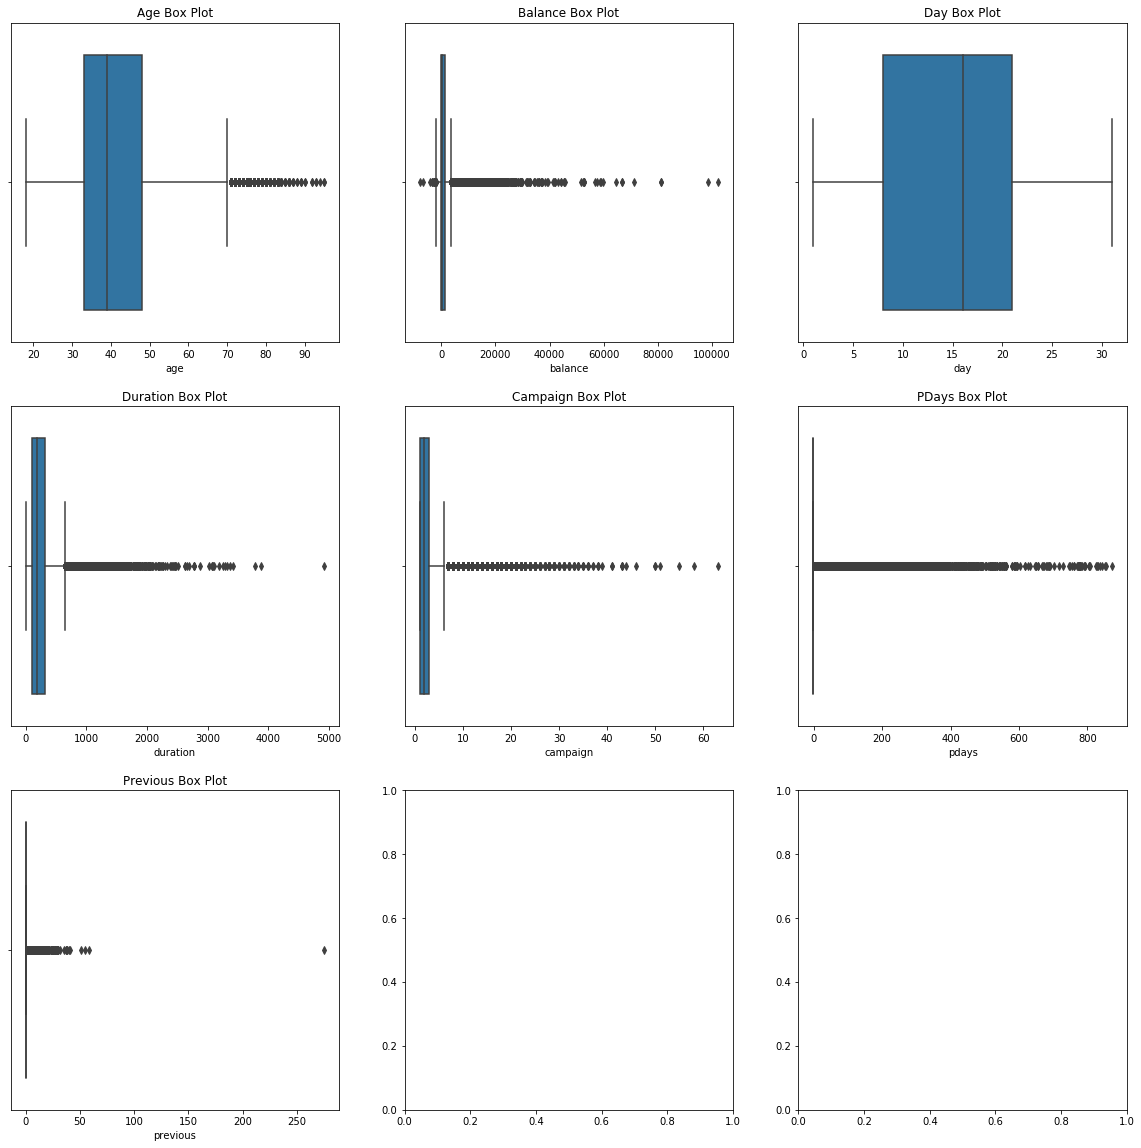

In [11]:
fig,axes=plt.subplots(3,3,figsize=(20,20))
sns.boxplot(bank_data['age'],ax=axes[0,0])
axes[0,0].set_title('Age Box Plot')

sns.boxplot(bank_data['balance'],ax=axes[0,1])
axes[0,1].set_title('Balance Box Plot')

sns.boxplot(bank_data['day'],ax=axes[0,2])
axes[0,2].set_title('Day Box Plot')

sns.boxplot(bank_data['duration'],ax=axes[1,0])
axes[1,0].set_title('Duration Box Plot')

sns.boxplot(bank_data['campaign'],ax=axes[1,1])
axes[1,1].set_title('Campaign Box Plot')

sns.boxplot(bank_data['pdays'],ax=axes[1,2])
axes[1,2].set_title('PDays Box Plot')

sns.boxplot(bank_data['previous'],ax=axes[2,0])
axes[2,0].set_title('Previous Box Plot')


###### Since we have a complex and biased data, Z Score would return better results for finding outiliers.The data almost matches with the ZScore Analysis and the distribution of outliers is as below

 age has 381 outliers as per z-score method 
 balance has 745 outliers as per z-score method
 day has 0 outliers as per z-score method
 duration has 963 outliers as per z-score method
 campaign has 840 outliers as per z-score method
 pdays has 1723 outliers as per z-score method
 previous has 582 outliers as per z-score method



# Data Preprocessing

In [12]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

#### Age has a minimum value of 18 and a maximum value of 95. It has a mean of 40 and a standard deviation of 10. It is good for further processing

#### The column Job is an Categorical Variable without order. Hence using Get Dummines to Encode it into multiple columns 

In [13]:
bank_data_processed=bank_data.copy()
bank_data_processed=bank_data_processed.merge(pd.get_dummies(bank_data_processed['job'],drop_first=True),left_index=True,right_index=True)
bank_data_processed.drop(['job'],axis=1,inplace=True)

In [14]:
bank_data_processed=bank_data_processed.merge(pd.get_dummies(bank_data_processed[['marital','education','contact','poutcome']],drop_first=True),left_index=True,right_index=True)
bank_data_processed.drop(['marital','education','contact','poutcome'],axis=1,inplace=True)

In [15]:
bank_data_processed.head()

age default  balance housing loan  day month  duration  campaign  pdays  \
0   58      no     2143     yes   no    5   may       261         1     -1   
1   44      no       29     yes   no    5   may       151         1     -1   
2   33      no        2     yes  yes    5   may        76         1     -1   
3   47      no     1506     yes   no    5   may        92         1     -1   
4   33      no        1      no   no    5   may       198         1     -1   

   ...  marital_married marital_single  education_secondary  \
0  ...                1              0                    0   
1  ...                0              1                    1   
2  ...                1              0                    1   
3  ...                1              0                    0   
4  ...                0              1                    0   

   education_tertiary  education_unknown  contact_telephone  contact_unknown  \
0                   1                  0                  0                1   
1                   0                  0                  0                1   
2                   0                  0                  0                1   
3                   0                  1                  0                1   
4                   0                  1                  0                1   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 33 columns]

In [16]:
for i,cname in enumerate(bank_data_processed.columns):
    if ((i==1)|(i==3)|(i==4)|(i==11)):
        bank_data_processed[cname]=bank_data_processed[cname].replace({'yes':1,'no':0})

In [17]:
bank_data_processed.head()

age  default  balance  housing  loan  day month  duration  campaign  pdays  \
0   58        0     2143        1     0    5   may       261         1     -1   
1   44        0       29        1     0    5   may       151         1     -1   
2   33        0        2        1     1    5   may        76         1     -1   
3   47        0     1506        1     0    5   may        92         1     -1   
4   33        0        1        0     0    5   may       198         1     -1   

   ...  marital_married  marital_single  education_secondary  \
0  ...                1               0                    0   
1  ...                0               1                    1   
2  ...                1               0                    1   
3  ...                1               0                    0   
4  ...                0               1                    0   

   education_tertiary  education_unknown  contact_telephone  contact_unknown  \
0                   1                  0                  0                1   
1                   0                  0                  0                1   
2                   0                  0                  0                1   
3                   0                  1                  0                1   
4                   0                  1                  0                1   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 33 columns]

In [18]:
bank_data_processed['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [19]:
month_dictionary={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9}
bank_data_processed['month']=bank_data_processed['month'].replace(month_dictionary)

## Checking if the Dummies are replace properly


In [20]:
for i,cname in enumerate(bank_data_processed.columns):
    print('The Attribute {} has {} Unique entries'.format(cname,bank_data_processed[cname].nunique()))

The Attribute age has 77 Unique entries
The Attribute default has 2 Unique entries
The Attribute balance has 7168 Unique entries
The Attribute housing has 2 Unique entries
The Attribute loan has 2 Unique entries
The Attribute day has 31 Unique entries
The Attribute month has 12 Unique entries
The Attribute duration has 1573 Unique entries
The Attribute campaign has 48 Unique entries
The Attribute pdays has 559 Unique entries
The Attribute previous has 41 Unique entries
The Attribute Target has 2 Unique entries
The Attribute blue-collar has 2 Unique entries
The Attribute entrepreneur has 2 Unique entries
The Attribute housemaid has 2 Unique entries
The Attribute management has 2 Unique entries
The Attribute retired has 2 Unique entries
The Attribute self-employed has 2 Unique entries
The Attribute services has 2 Unique entries
The Attribute student has 2 Unique entries
The Attribute technician has 2 Unique entries
The Attribute unemployed has 2 Unique entries
The Attribute unknown has 2

In [21]:
bank_data_processed.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  marital_married  marital_single  education_secondary  \
0     -1  ...                1               0                    0   
1     -1  ...                0               1                    1   
2     -1  ...                1               0                    1   
3     -1  ...                1               0                    0   
4     -1  ...                0               1                    0   

   education_tertiary  education_unknown  contact_telephone  contact_unknown  \
0                   1                  0                  0                1   
1                   0                  0                  0                1   
2                   0                  0                  0                1   
3                   0                  1                  0                1   
4                   0                  1                  0                1   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 33 columns]

In [22]:
bank_data_processed.describe()

age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day         month      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419      6.144655    258.163080      2.763841     40.197828   
std        8.322476      2.408034    257.527812      3.098021    100.128746   
min        1.000000      1.000000      0.000000      1.000000     -1.000000   
25%        8.000000      5.000000    103.000000      1.000000     -1.000000   
50%       16.000000      6.000000    180.000000      2.000000     -1.000000   
75%       21.000000      8.000000    319.000000      3.000000     -1.000000   
max       31.000000     12.000000   4918.000000     63.000000    871.000000   

       ...  marital_married  marital_single  education_secondary  \
count  ...     45211.000000    45211.000000         45211.000000   
mean   ...         0.601933        0.282896             0.513194   
std    ...         0.489505        0.450411             0.499831   
min    ...         0.000000        0.000000             0.000000   
25%    ...         0.000000        0.000000             0.000000   
50%    ...         1.000000        0.000000             1.000000   
75%    ...         1.000000        1.000000             1.000000   
max    ...         1.000000        1.000000             1.000000   

       education_tertiary  education_unknown  contact_telephone  \
count        45211.000000       45211.000000       45211.000000   
mean             0.294198           0.041074           0.064276   
std              0.455687           0.198464           0.245247   
min              0.000000           0.000000           0.000000   
25%              0.000000           0.000000           0.000000   
50%              0.000000           0.000000           0.000000   
75%              1.000000           0.000000           0.000000   
max              1.000000           1.000000           1.000000   

       contact_unknown  poutcome_other  poutcome_success  poutcome_unknown  
count     45211.000000    45211.000000      45211.000000      45211.000000  
mean          0.287983        0.040698          0.033421          0.817478  
std           0.452828        0.197592          0.179735          0.386278  
min           0.000000        0.000000          0.000000          0.000000  
25%           0.000000        0.000000          0.000000          1.000000  
50%           0.000000        0.000000          0.000000          1.000000  
75%           1.000000        0.000000          0.000000          1.000000  
max           1.000000        1.000000          1.000000          1.000000  

[8 rows x 33 columns]

-1 is an abnormal value for pdays. 
Since it has over 32000 entries it cannot be removed. 
Assuming that pdays=-1 -> The person was not contacted.Replacing it with 999 as in the database

In [23]:
bank_data_processed['pdays']=bank_data_processed['pdays'].replace(-1,999)

Checking the variation in flation factor to check for correlation between the attributes


In [24]:
bank_x=bank_data_processed.drop('Target',axis=1)
bank_y=bank_data_processed['Target']
bank_x.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  marital_married  marital_single  education_secondary  \
0    999  ...                1               0                    0   
1    999  ...                0               1                    1   
2    999  ...                1               0                    1   
3    999  ...                1               0                    0   
4    999  ...                0               1                    0   

   education_tertiary  education_unknown  contact_telephone  contact_unknown  \
0                   1                  0                  0                1   
1                   0                  0                  0                1   
2                   0                  0                  0                1   
3                   0                  1                  0                1   
4                   0                  1                  0                1   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 32 columns]

### Checking the importance of variables 

In [25]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(bank_x.values,i) for i in range (bank_x.values.shape[1])]
vif['features']=bank_x.columns

In [26]:
vif

VIF             features
0    18.614403                  age
1     1.032695              default
2     1.249582              balance
3     2.613228              housing
4     1.225869                 loan
5     4.692986                  day
6     7.865003                month
7     2.013448             duration
8     1.890848             campaign
9   270.597659                pdays
10    1.468214             previous
11    2.950283          blue-collar
12    1.328176         entrepreneur
13    1.290503            housemaid
14    3.717779           management
15    1.788798              retired
16    1.349147        self-employed
17    1.744762             services
18    1.226809              student
19    2.419796           technician
20    1.245029           unemployed
21    1.095911              unknown
22    5.783334      marital_married
23    3.360494       marital_single
24    4.708869  education_secondary
25    4.387929   education_tertiary
26    1.333822    education_unknown
27    1.150597    contact_telephone
28    1.765405      contact_unknown
29    1.355168       poutcome_other
30    1.335216     poutcome_success
31  178.779684     poutcome_unknown

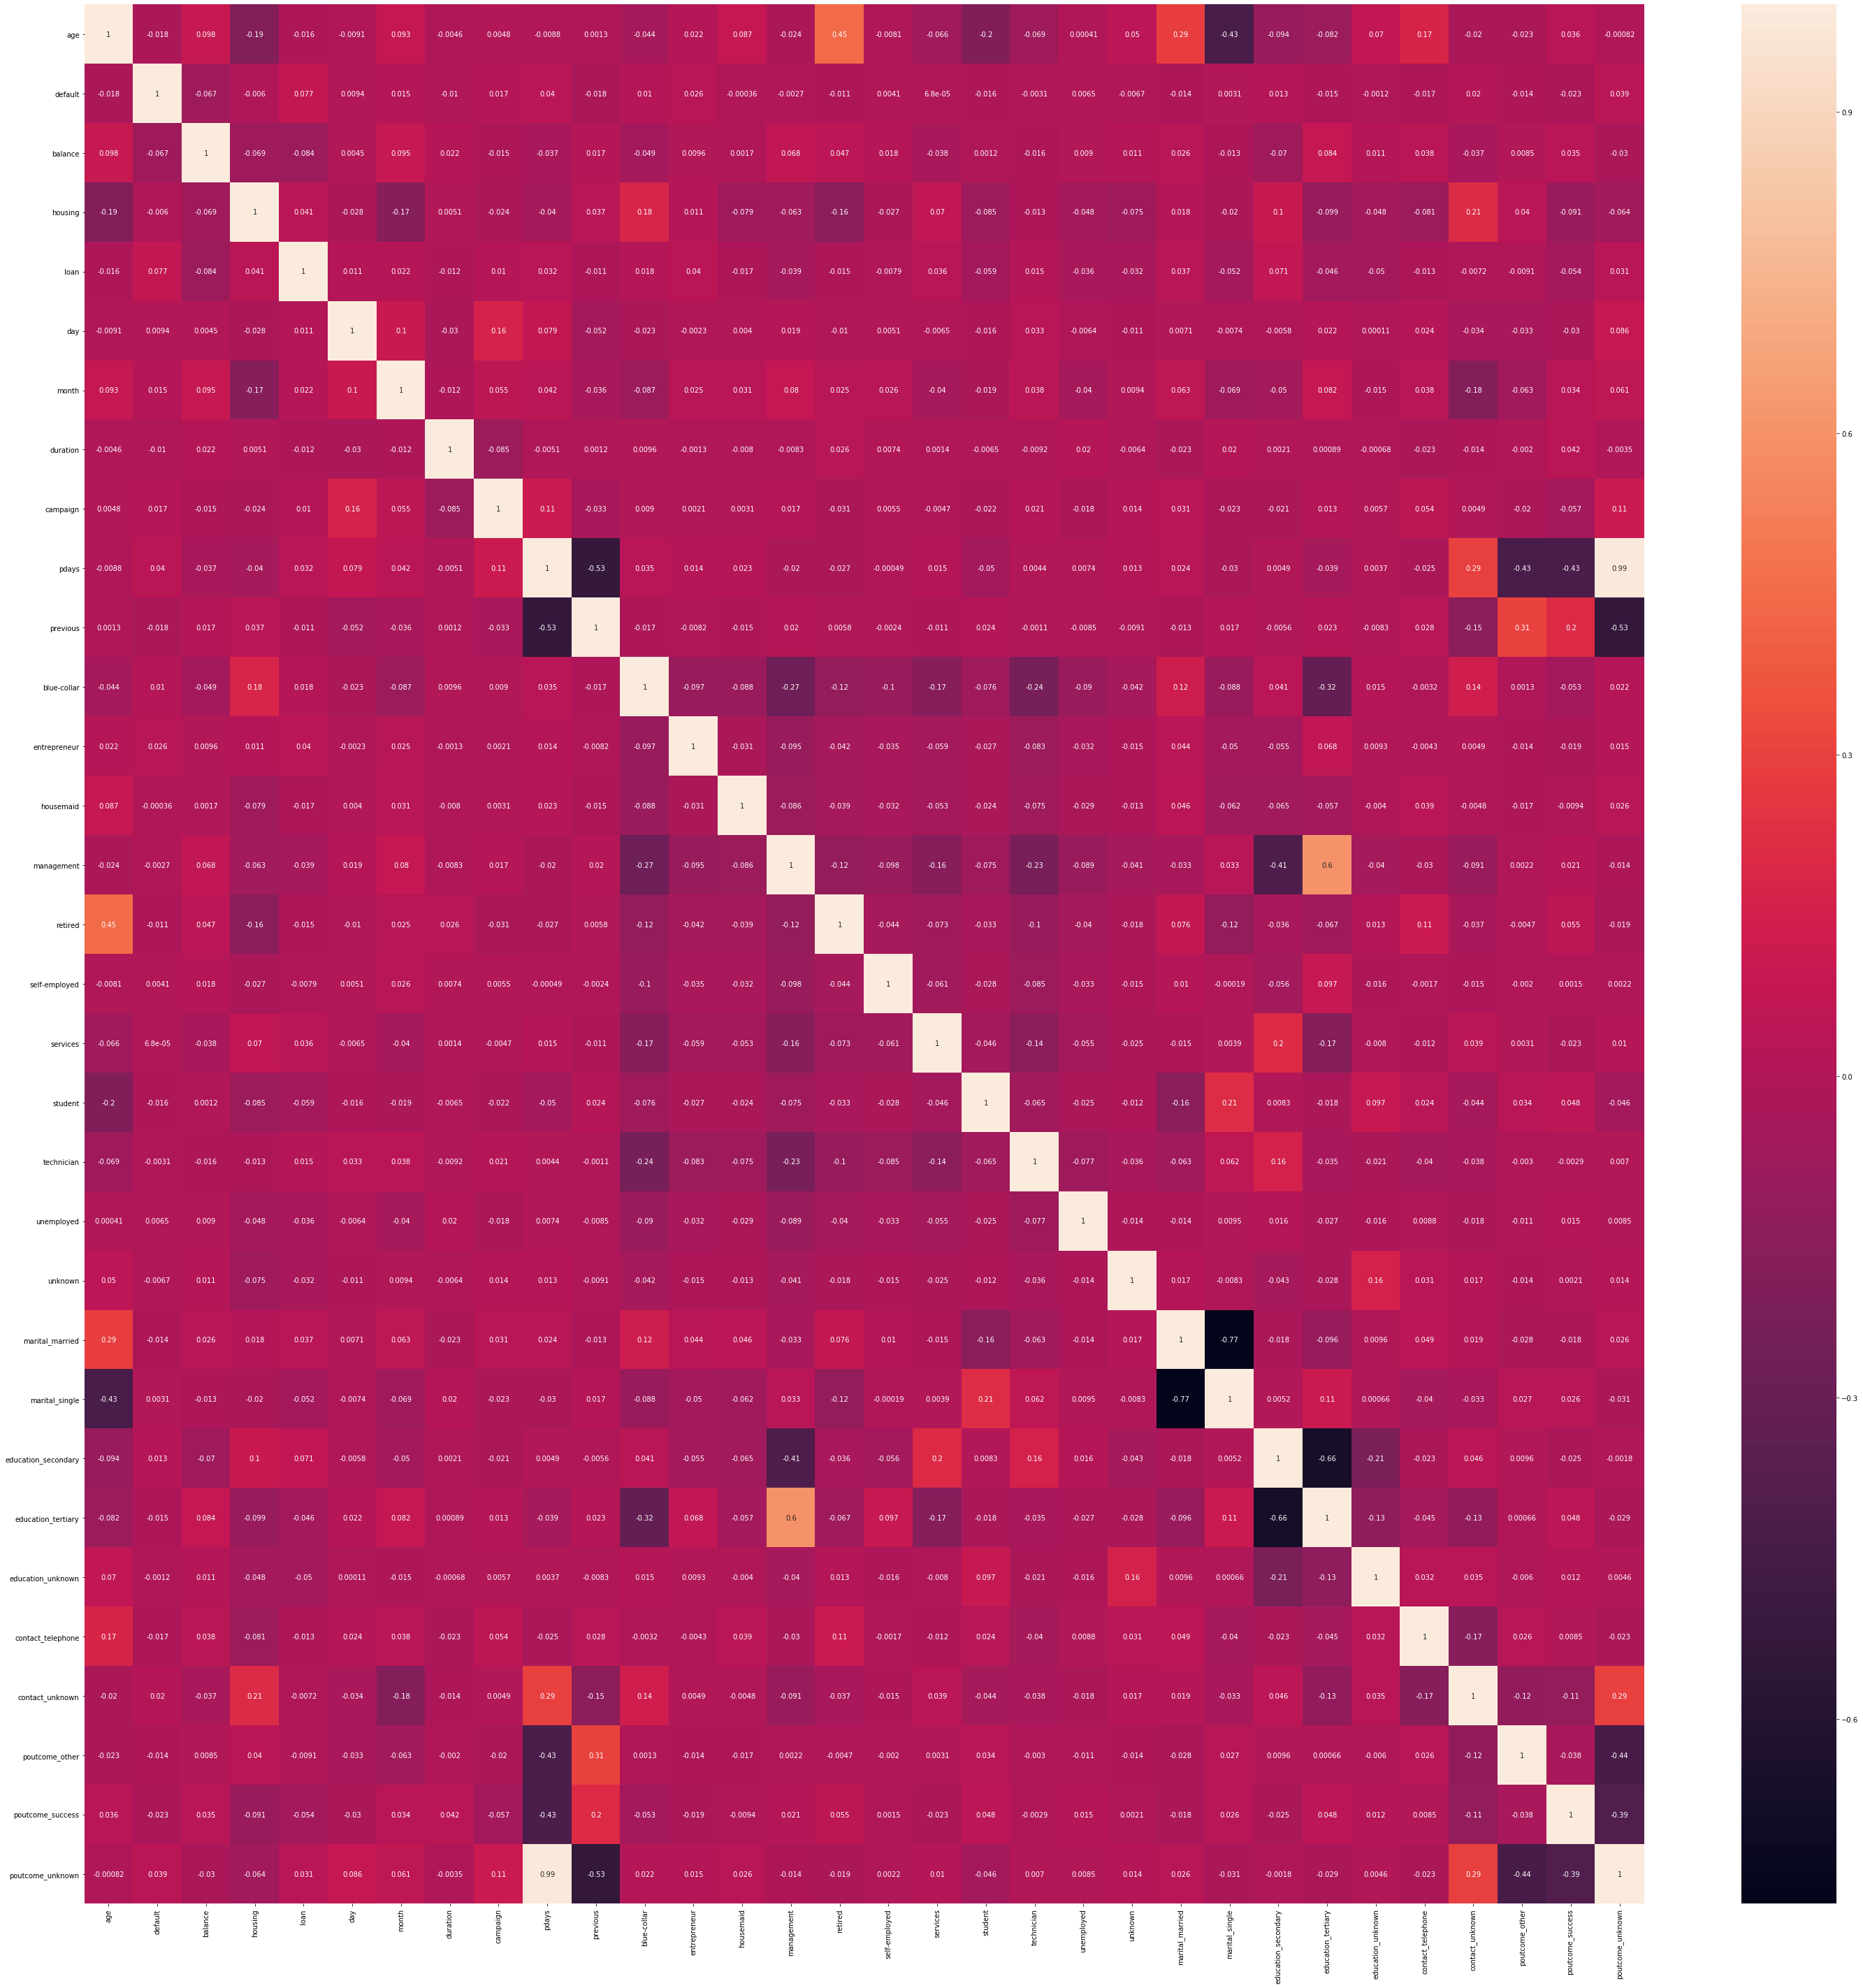

In [27]:
corr=bank_x.corr()
fig,axes=plt.subplots(figsize=(50,50))
sns.heatmap(corr,ax=axes,annot=True)

In [28]:
for i,cname in enumerate(corr):
    for j in range(len(corr)):
        if ((abs(corr[cname][j])>0.5 ) & ( abs(corr[cname][j]) <0.8 ) &(cname!= corr.columns[j])):
            print('|  {}  |,  {} has moderate correlation with {}'.format(corr[cname][j],cname,corr.columns[j]))
        elif (abs(corr[cname][j])>0.8 ) &(cname!= corr.columns[j]):
            print('|  {}  |,  {} has extreme correlation with {}'.format(corr[cname][j],cname,corr.columns[j]))

|  -0.5289097984221611  |,  pdays has moderate correlation with previous
|  0.9863879041677006  |,  pdays has extreme correlation with poutcome_unknown
|  -0.5289097984221611  |,  previous has moderate correlation with pdays
|  -0.5327628069522209  |,  previous has moderate correlation with poutcome_unknown
|  0.5988998438607005  |,  management has moderate correlation with education_tertiary
|  -0.772357202844412  |,  marital_married has moderate correlation with marital_single
|  -0.772357202844412  |,  marital_single has moderate correlation with marital_married
|  -0.6628897452789013  |,  education_secondary has moderate correlation with education_tertiary
|  0.5988998438607005  |,  education_tertiary has moderate correlation with management
|  -0.6628897452789013  |,  education_tertiary has moderate correlation with education_secondary
|  0.9863879041677006  |,  poutcome_unknown has extreme correlation with pdays
|  -0.5327628069522209  |,  poutcome_unknown has moderate correlatio

### Pdays and Poutcome has very high correlation with pcoutomeunknown and as per our VIF Test, Pdays will have to be dropped out as it has a very high VIF factor

Pdays also has some correlation with previous,
and previous has correlation with poutcome_unknown

Also there is a relation between people with management jobs and people who have tertiary education

In [29]:
bank_x.drop(['pdays','poutcome_unknown'],axis=1,inplace=True)

### Splitting data for analysis

In [30]:
x_train,x_test,y_train,y_test=train_test_split(bank_x,bank_y,test_size=0.3,random_state=1)

### Feature Scaling


In [31]:

ss=StandardScaler()
train_x_scaled=ss.fit_transform(x_train)
train_x_scaled=pd.DataFrame(train_x_scaled)
column=bank_x.columns

test_x_scaled=ss.fit_transform(x_test)
test_x_scaled=pd.DataFrame(test_x_scaled)
train_x_scaled.columns=column
test_x_scaled.columns=column

Doing Feature Scaling to normalise the data and to reduce the comptational time

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lgr_model=LogisticRegression(random_state=1)
lgr_model.fit(train_x_scaled,y_train)

C:\Users\Sandheep Gopinath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lgr_model.score(train_x_scaled,y_train)

0.9002749075741776

In [34]:
 lgr_model.score(test_x_scaled,y_test)

0.9014302565614863

### Creating a Dataframe for result comparison

In [287]:
results=pd.DataFrame(columns=['Model','Accuracy'])
results=results.append({'Model': 'Logistic Regresion','Accuracy':lgr_model.score(test_x_scaled,y_test)},ignore_index=True)
results

Model  Accuracy
0  Logistic Regresion   0.90143

### Dropping columns to check for accuracy change

In [37]:
train_x_scaled_dropped=train_x_scaled
train_x_scaled_dropped=train_x_scaled_dropped.drop(['marital_single','management','education_secondary'],axis=1)
lgr_model1=LogisticRegression(random_state=1)
lgr_model1.fit(train_x_scaled_dropped,y_train)
lgr_model1.score(train_x_scaled_dropped,y_train)

C:\Users\Sandheep Gopinath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9003065061459222

In [38]:
test_x_scaled_dropped=test_x_scaled
test_x_scaled_dropped=test_x_scaled_dropped.drop(['marital_single','management','education_secondary'],axis=1)
lgr_model1.score(test_x_scaled_dropped,y_test)


0.9009141846063108

Dropping 3 columns with moderate correlation , the accuracy remains almost the same(reduces by 0.001). But we have lesser computation with 3 dropped columns

In [289]:
results=results.append(pd.DataFrame([('Logistic Regression (Dropped)',lgr_model1.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0             Logistic Regresion  0.901430
1  Logistic Regression (Dropped)  0.900914
2  Logistic Regression (Dropped)  0.900914

In [56]:
predict_lgr=lgr_model.predict(test_x_scaled)
predict_lgrd=lgr_model1.predict(test_x_scaled_dropped)

### Naive Bayes


In [40]:
nbm=GaussianNB()
nbm.fit(train_x_scaled,y_train)
nbmd=GaussianNB()
nbmd.fit(train_x_scaled_dropped,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
print('The accuracy of the Naive Bayes algorithm with all attributes is {}'.format(nbm.score(test_x_scaled,y_test)))
print('The accuracy of the Naive Bayes algorithm with dropped attribues is {}'.format(nbmd.score(test_x_scaled_dropped,y_test)))


The accuracy of the Naive Bayes algorithm with all attributes is 0.8418608080212326
The accuracy of the Naive Bayes algorithm with dropped attribues is 0.8406812149808316


In [290]:
results=results.append(pd.DataFrame([('Naive Bayes',nbm.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Naive Bayes (Dropped)',nbmd.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0             Logistic Regresion  0.901430
1  Logistic Regression (Dropped)  0.900914
2  Logistic Regression (Dropped)  0.900914
3                    Naive Bayes  0.841861
4          Naive Bayes (Dropped)  0.840681

In [55]:
predict_nb=nbm.predict(test_x_scaled)
predict_nbd=nbmd.predict(test_x_scaled_dropped)

### K Nearest Neighbors

In [43]:
knnm=KNeighborsClassifier(n_neighbors=10,weights='distance')
knnmd=KNeighborsClassifier(n_neighbors=5,weights='distance')
knnm.fit(train_x_scaled,y_train)
knnmd.fit(train_x_scaled_dropped,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [45]:
print('The accuracy of the KNN algorithm with all attributes is {}'.format(knnm.score(test_x_scaled,y_test)))
print('The accuracy of the KNN algorithm with dropped attribues is {}'.format(knnmd.score(test_x_scaled_dropped,y_test)))


The accuracy of the KNN algorithm with all attributes is 0.8991447950457092
The accuracy of the KNN algorithm with dropped attribues is 0.8956060159245061


In [291]:
results=results.append(pd.DataFrame([('KNN',knnm.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('KNN (Dropped)',knnmd.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0             Logistic Regresion  0.901430
1  Logistic Regression (Dropped)  0.900914
2  Logistic Regression (Dropped)  0.900914
3                    Naive Bayes  0.841861
4          Naive Bayes (Dropped)  0.840681
5                            KNN  0.899145
6                  KNN (Dropped)  0.895606

In [57]:
predict_knn=knnm.predict(test_x_scaled)
predict_knnd=knnmd.predict(test_x_scaled_dropped)

### Support Vector Machines

In [63]:
svmm=svm.SVC(gamma=0.025,C=5)
svmmd=svm.SVC(gamma=0.025,C=5)
svmm.fit(train_x_scaled,y_train)
svmmd.fit(train_x_scaled_dropped,y_train)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
score=svmm.score(test_x_scaled,y_test)
scored=svmmd.score(test_x_scaled_dropped,y_test)

In [65]:
print('The accuracy of the SVM algorithm with all attributes is {}'.format(score))
print('The accuracy of the SVM algorithm with dropped attribues is {}'.format(scored))


The accuracy of the SVM algorithm with all attributes is 0.9019463285166618
The accuracy of the SVM algorithm with dropped attribues is 0.9020200530816869


In [292]:
results=results.append(pd.DataFrame([('SVM',score)],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('SVM (Dropped)',scored)],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0             Logistic Regresion  0.901430
1  Logistic Regression (Dropped)  0.900914
2  Logistic Regression (Dropped)  0.900914
3                    Naive Bayes  0.841861
4          Naive Bayes (Dropped)  0.840681
5                            KNN  0.899145
6                  KNN (Dropped)  0.895606
7                            SVM  0.901946
8                  SVM (Dropped)  0.902020

In [68]:
predict_svm=svmm.predict(test_x_scaled)
predict_svmd=svmmd.predict(test_x_scaled_dropped)

In [293]:
predictions=pd.DataFrame()
predictions['Logistic']=predict_lgr
predictions['Logistic Drop']=predict_lgrd
predictions['Naive']=predict_nb
predictions['Naive Drop']=predict_nbd
predictions['KNN']=predict_knn
predictions['KNN Drop']=predict_knnd
predictions['SVM']=predict_svm
predictions['SVM Drop']=predict_svmd


predictions.head()

Logistic  Logistic Drop  Naive  Naive Drop  KNN  KNN Drop  SVM  SVM Drop
0         0              0      0           0    0         0    0         0
1         0              0      0           0    0         0    0         0
2         0              0      0           0    0         0    0         0
3         1              1      1           1    1         1    1         1
4         0              0      0           0    0         0    0         0

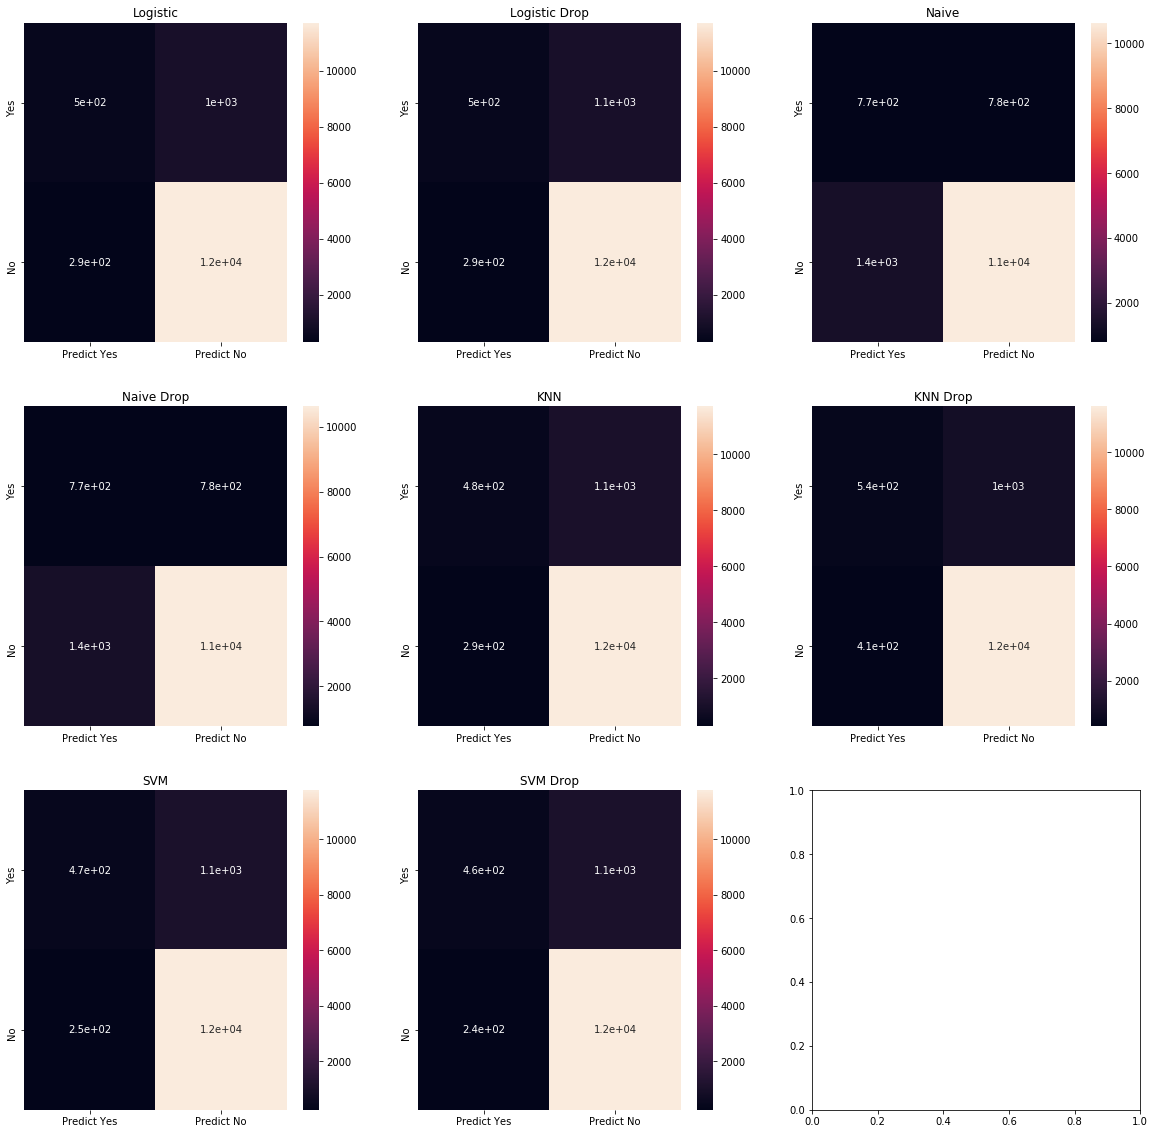

In [112]:
count=0
p_column=predictions.columns
fig,axes=plt.subplots(3,3,figsize=(20,20))
for i in range(3):
    for j in range(3):
        if count<8:
            cm=metrics.confusion_matrix(y_test,predictions[p_column[count]],labels=[1,0])
            cmd=pd.DataFrame(cm,index=['Yes','No'],columns=['Predict Yes','Predict No'])
            sns.heatmap(cmd,annot=True,ax=axes[i,j])
            axes[i,j].set_title(predictions.columns[count])

            count=count+1
            



In [120]:

count=0
p_column=predictions.columns
for i in range(3):
    for j in range(3):
        if count<8:
            cm=metrics.confusion_matrix(y_test,predictions[p_column[count]],labels=[1,0])
            cmd=pd.DataFrame(cm,index=['Yes','No'],columns=['Predict Yes','Predict No'])
            print('\n\n',predictions.columns[count])
            print(cmd)
            
            count=count+1



 Logistic
     Predict Yes  Predict No
Yes          503        1048
No           289       11724


 Logistic Drop
     Predict Yes  Predict No
Yes          500        1051
No           293       11720


 Naive
     Predict Yes  Predict No
Yes          774         777
No          1368       10645


 Naive Drop
     Predict Yes  Predict No
Yes          770         781
No          1380       10633


 KNN
     Predict Yes  Predict No
Yes          477        1074
No           294       11719


 KNN Drop
     Predict Yes  Predict No
Yes          544        1007
No           409       11604


 SVM
     Predict Yes  Predict No
Yes          473        1078
No           252       11761


 SVM Drop
     Predict Yes  Predict No
Yes          459        1092
No           237       11776


### Out of the classification algorithms, SVM Drop algorthim would be the best as 
  It has better prediction rate, 
  Low False negative rate as it can lead to creation of wrong strategies and
  High True Negative rates
        

### Decision Tree Classifier

In [139]:
treeg=DecisionTreeClassifier(criterion='gini',random_state=1)
treeg.fit(train_x_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [141]:
treeg.score(train_x_scaled,y_train)

1.0

In [142]:
treeg.score(test_x_scaled,y_test)

0.8710557357711589

In [143]:
treee=DecisionTreeClassifier(criterion='gini',random_state=1)
treee.fit(train_x_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [144]:
treeg.score(train_x_scaled,y_train)

1.0

In [145]:
treeg.score(test_x_scaled,y_test)

0.8710557357711589

In [294]:
results=results.append(pd.DataFrame([('Decision Tree Gini',treeg.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Decision Tree Entropy',treee.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0              Logistic Regresion  0.901430
1   Logistic Regression (Dropped)  0.900914
2   Logistic Regression (Dropped)  0.900914
3                     Naive Bayes  0.841861
4           Naive Bayes (Dropped)  0.840681
5                             KNN  0.899145
6                   KNN (Dropped)  0.895606
7                             SVM  0.901946
8                   SVM (Dropped)  0.902020
9              Decision Tree Gini  0.871056
10          Decision Tree Entropy  0.871056

The model is overfit. Hence it has to be regularised. 

### Regularising the tree

In [178]:
regular_treeg=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
regular_treeg.fit(train_x_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [179]:
regular_treeg.score(train_x_scaled,y_train)

0.9007804847220906

In [180]:
regular_treeg.score(test_x_scaled,y_test)

0.9023149513417871

### Entropy based Decision tree

In [200]:
regular_treee=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
regular_treee.fit(train_x_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [202]:
regular_treee.score(train_x_scaled,y_train)

0.8997693304262647

In [203]:
regular_treee.score(test_x_scaled,y_test)

0.9014302565614863

### Gini based Decision tree Attributes Dropped


In [205]:
regular_treegd=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
regular_treegd.fit(train_x_scaled_dropped,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [206]:
regular_treegd.score(train_x_scaled_dropped,y_train)

0.8997693304262647

In [198]:
regular_treegd.score(test_x_scaled_dropped,y_test)

0.9014302565614863

### Entropy based Decision tree attributes dropped


In [212]:
regular_treeed=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
regular_treeed.fit(train_x_scaled_dropped,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [213]:
regular_treeed.score(train_x_scaled_dropped,y_train)

0.8997693304262647

In [214]:
regular_treeed.score(test_x_scaled_dropped,y_test)

0.9014302565614863

In [295]:
results=results.append(pd.DataFrame([('Regularised Decision Tree Gini ',regular_treeg.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Regularised Decision Tree Entropy ',regular_treee.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0                   Logistic Regresion  0.901430
1        Logistic Regression (Dropped)  0.900914
2        Logistic Regression (Dropped)  0.900914
3                          Naive Bayes  0.841861
4                Naive Bayes (Dropped)  0.840681
5                                  KNN  0.899145
6                        KNN (Dropped)  0.895606
7                                  SVM  0.901946
8                        SVM (Dropped)  0.902020
9                   Decision Tree Gini  0.871056
10               Decision Tree Entropy  0.871056
11     Regularised Decision Tree Gini   0.902315
12  Regularised Decision Tree Entropy   0.901430

In [296]:
results=results.append(pd.DataFrame([('Regularised Decision Tree Gini Drop',regular_treegd.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Regularised Decision Tree Entropy Drop',regular_treeed.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0                       Logistic Regresion  0.901430
1            Logistic Regression (Dropped)  0.900914
2            Logistic Regression (Dropped)  0.900914
3                              Naive Bayes  0.841861
4                    Naive Bayes (Dropped)  0.840681
5                                      KNN  0.899145
6                            KNN (Dropped)  0.895606
7                                      SVM  0.901946
8                            SVM (Dropped)  0.902020
9                       Decision Tree Gini  0.871056
10                   Decision Tree Entropy  0.871056
11         Regularised Decision Tree Gini   0.902315
12      Regularised Decision Tree Entropy   0.901430
13     Regularised Decision Tree Gini Drop  0.901430
14  Regularised Decision Tree Entropy Drop  0.901430

### Random Forest Classifier Regularised

In [259]:
forest=RandomForestClassifier(random_state=1,criterion='gini',n_estimators=100,max_depth=10)
forest.fit(train_x_scaled,y_train)
forest.score(train_x_scaled,y_train)

0.9152210320093532

In [260]:
forest.score(test_x_scaled,y_test)

0.9009879091713359

### Random Forest Classifier Regularised Drop n=300 gini


In [261]:
forestd=RandomForestClassifier(random_state=1,criterion='gini',n_estimators=300,max_depth=10)
forestd.fit(train_x_scaled_dropped,y_train)
forestd.score(train_x_scaled_dropped,y_train)

0.9193604449078902

In [262]:
forestd.score(test_x_scaled_dropped,y_test)

0.9020937776467118

### Random Forest Classifier Regularised Entropy n=200

In [263]:
foreste=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=200,max_depth=10)
foreste.fit(train_x_scaled,y_train)
foreste.score(train_x_scaled,y_train)

0.9075109805036813

In [264]:
foreste.score(test_x_scaled,y_test)

0.8995871424358596

### Random Forest Classifier Entropy n=200 Drop

In [268]:
forested=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=200,max_depth=10)
forested.fit(train_x_scaled_dropped,y_train)
forested.score(train_x_scaled_dropped,y_train)

0.9129459348437451

In [269]:
forested.score(test_x_scaled_dropped,y_test)

0.9015777056915364

In [297]:
results=results.append(pd.DataFrame([('Regularised Random Forest Gini',forest.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Regularised Random Forest Gini Drop n=300',forestd.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Regularised Random Forest Entropy n=200',foreste.score(test_x_scaled,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results=results.append(pd.DataFrame([('Regularised Random Forest Entropy Drop n=200',forested.score(test_x_scaled_dropped,y_test))],columns=['Model','Accuracy']),ignore_index=True)
results

Model  Accuracy
0                             Logistic Regresion  0.901430
1                  Logistic Regression (Dropped)  0.900914
2                  Logistic Regression (Dropped)  0.900914
3                                    Naive Bayes  0.841861
4                          Naive Bayes (Dropped)  0.840681
5                                            KNN  0.899145
6                                  KNN (Dropped)  0.895606
7                                            SVM  0.901946
8                                  SVM (Dropped)  0.902020
9                             Decision Tree Gini  0.871056
10                         Decision Tree Entropy  0.871056
11               Regularised Decision Tree Gini   0.902315
12            Regularised Decision Tree Entropy   0.901430
13           Regularised Decision Tree Gini Drop  0.901430
14        Regularised Decision Tree Entropy Drop  0.901430
15                Regularised Random Forest Gini  0.900988
16     Regularised Random Forest Gini Drop n=300  0.902094
17       Regularised Random Forest Entropy n=200  0.899587
18  Regularised Random Forest Entropy Drop n=200  0.901578

In [279]:
print(' The average of the prediction accuracy of all classification models is {}'.format(results['Accuracy'][0:8].mean()))
print(' The average of the prediction accuracy of all ensemble models is {}'.format(results['Accuracy'][8:21].mean()))

 The average of the prediction accuracy of all classification models is 0.8854504570923031
 The average of the prediction accuracy of all ensemble models is 0.8965871197513782


The average prediction power of ensemble models is slighlt higher than that of classification models

In [298]:
predictions['Decision Tree Gini']=treeg.predict(test_x_scaled)
predictions['Decision Tree Entropy']=treee.predict(test_x_scaled)
predictions['Regularised Decision Tree Gini']=regular_treeg.predict(test_x_scaled)
predictions['Regularised Decision Tree Entropy']=regular_treee.predict(test_x_scaled)
predictions['Regularised Decision Tree Gini Drop']=regular_treegd.predict(test_x_scaled_dropped)
predictions['Regularised Decision Tree Entropy Drop']=regular_treeed.predict(test_x_scaled_dropped)
predictions['Regularised Random Forest Gini']=forest.predict(test_x_scaled)
predictions['Regular Forest Gini n=300 Drop']=forestd.predict(test_x_scaled_dropped)
predictions['Regularised Random Forest Gini Drop n=300']=foreste.predict(test_x_scaled)
predictions['Regularised Random Forest Entropy n=200']=forested.predict(test_x_scaled_dropped)

predictions.head()

Logistic  Logistic Drop  Naive  Naive Drop  KNN  KNN Drop  SVM  SVM Drop  \
0         0              0      0           0    0         0    0         0   
1         0              0      0           0    0         0    0         0   
2         0              0      0           0    0         0    0         0   
3         1              1      1           1    1         1    1         1   
4         0              0      0           0    0         0    0         0   

   Decision Tree Gini  Decision Tree Entropy  Regularised Decision Tree Gini  \
0                   0                      0                               0   
1                   0                      0                               0   
2                   0                      0                               1   
3                   0                      0                               1   
4                   0                      0                               0   

   Regularised Decision Tree Entropy  Regularised Decision Tree Gini Drop  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  1                                    1   
4                                  0                                    0   

   Regularised Decision Tree Entropy Drop  Regularised Random Forest Gini  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   
3                                       1                               1   
4                                       0                               0   

   Regular Forest Gini n=300 Drop  Regularised Random Forest Gini Drop n=300  \
0                               0                                          0   
1                               0                                          0   
2                               0                                          0   
3                               1                                          1   
4                               0                                          0   

   Regularised Random Forest Entropy n=200  
0                                        0  
1                                        0  
2                                        0  
3                                        1  
4                                        0

In [299]:

count=0
p_column=predictions.columns
for i in range(5):
    for j in range(4):
        if count<17:
            cm=metrics.confusion_matrix(y_test,predictions[p_column[count]],labels=[1,0])
            cmd=pd.DataFrame(cm,index=['Yes','No'],columns=['Predict Yes','Predict No'])
            print('\n\n',predictions.columns[count])
            print(cmd)
            
            count=count+1



 Logistic
     Predict Yes  Predict No
Yes          503        1048
No           289       11724


 Logistic Drop
     Predict Yes  Predict No
Yes          500        1051
No           293       11720


 Naive
     Predict Yes  Predict No
Yes          774         777
No          1368       10645


 Naive Drop
     Predict Yes  Predict No
Yes          770         781
No          1380       10633


 KNN
     Predict Yes  Predict No
Yes          477        1074
No           294       11719


 KNN Drop
     Predict Yes  Predict No
Yes          544        1007
No           409       11604


 SVM
     Predict Yes  Predict No
Yes          473        1078
No           252       11761


 SVM Drop
     Predict Yes  Predict No
Yes          459        1092
No           237       11776


 Decision Tree Gini
     Predict Yes  Predict No
Yes          753         798
No           951       11062


 Decision Tree Entropy
     Predict Yes  Predict No
Yes          753         798
No           951      

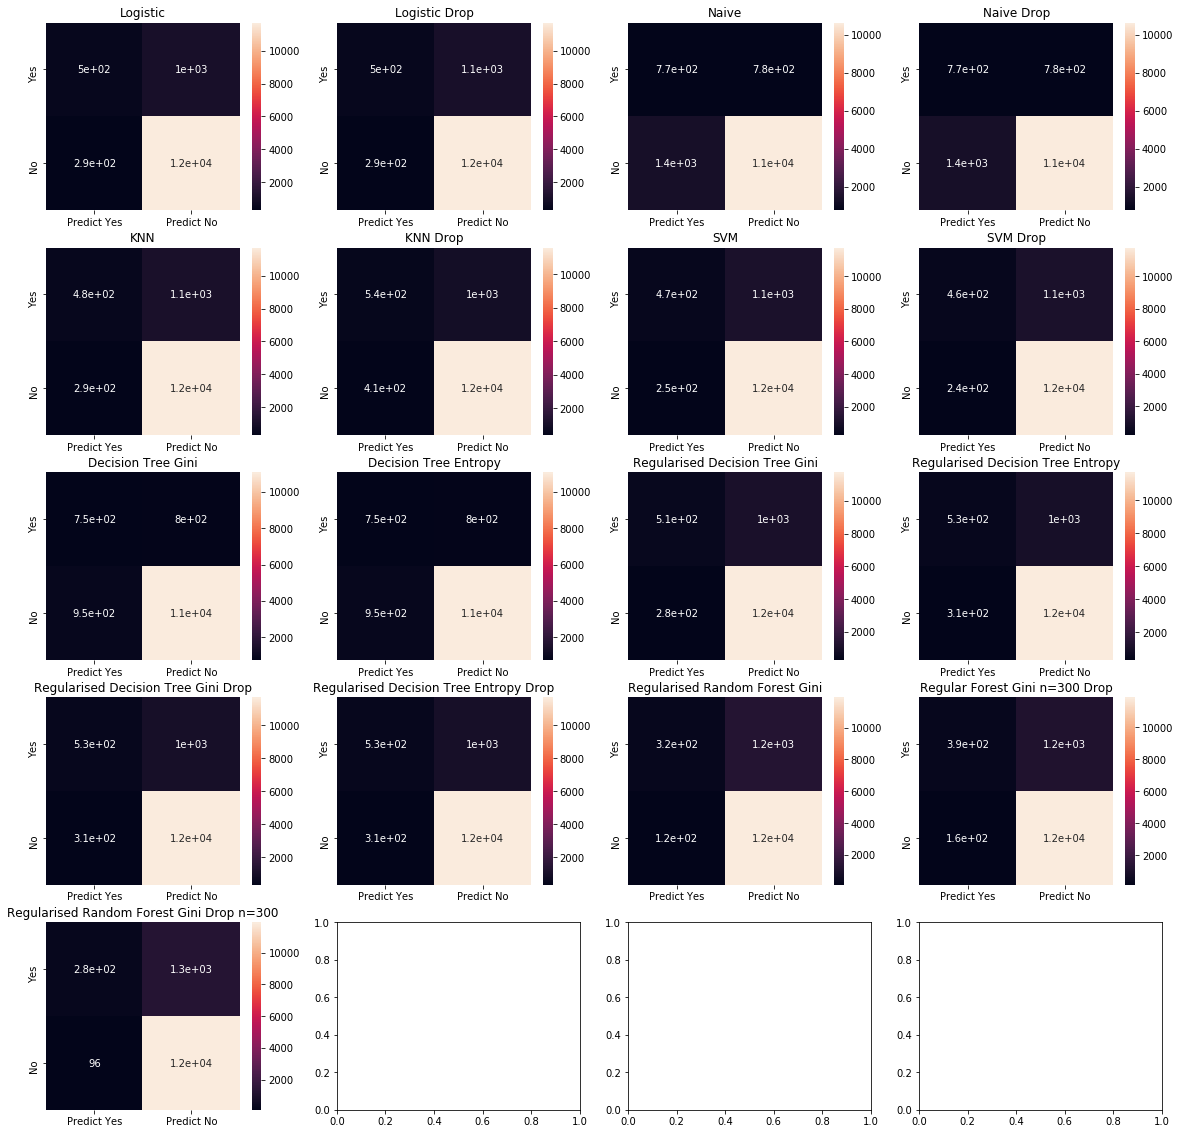

In [300]:
count=0
p_column=predictions.columns
fig,axes=plt.subplots(5,4,figsize=(20,20))
for i in range(5):
    for j in range(4):
        if count<17:
            cm=metrics.confusion_matrix(y_test,predictions[p_column[count]],labels=[1,0])
            cmd=pd.DataFrame(cm,index=['Yes','No'],columns=['Predict Yes','Predict No'])
            sns.heatmap(cmd,annot=True,ax=axes[i,j])
            axes[i,j].set_title(predictions.columns[count])

            count=count+1
            


### Out of all models, the  Regularised Gini Random Forest with n=300 has the least number of False Positives. It also has a low value of Flase Negative compared with other models. 
Hence it should be the best of all the models for this scenario